In [108]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import OrderedDict
import matplotlib.pyplot as plt

In [128]:
class NeuralNet:
    def __init__(self, train_params_list, train_result_list, input_size, hidden_size, out_size):
        self.params = {}
        self.train_params_list = train_params_list
        self.train_result_list = train_result_list
        self.params['W1'] = 0.05 * np.random.randn(input_size, hidden_size)
        self.params['W2'] = 0.05 * np.random.randn(hidden_size, out_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['b2'] = np.zeros(out_size)
        
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
    
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
    
    def loss(self, x, t):
        y = self.predict(x)
        loss = y - t 
        return loss
    
    def accuracy(self, x, t):
        y = self.predict(x)
        correct_count = 0
        
        for i in range(y.shape[0]):
            y[i] = 0 if y[i] <= 0.5 else 1
            correct_count += 1 if y[i] == t[i] else 0
        
        return correct_count / float(y.shape[0])
    
    def gradient(self, x, t):
        loss = self.loss(x, t)
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            loss = layer.backward(loss)
            
        grads = {}
        grads['W1'] = self.layers['Affine1'].dW
        grads['b1'] = self.layers['Affine1'].db
        grads['W2'] = self.layers['Affine2'].dW
        grads['b2'] = self.layers['Affine2'].db
        
        return grads

In [129]:
class Relu:
    def __init__(self):
        self.mask = None
        
    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        
        return out
        
    def backward(self, dout):
        dout[self.mask] = 0
        
        return dout

class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.original_x_shape = None
        self.dW = None
        self.db = None
        
    def forward(self, x):
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x
        out = np.dot(x, self.W) + self.b
        
        return out
    
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        dx = dx.reshape(*self.original_x_shape)
        
        return dx

In [135]:
df = pd.read_csv("full_matching_data.csv")
train_list, test_list = train_test_split(df, test_size=0.3)

train_params_list = np.array(train_list.drop('match', axis=1))
train_result_list = np.array(train_list['match'])
test_params_list = np.array(test_list.drop('match', axis=1))
test_result_list = np.array(test_list['match'])

train_size = train_params_list.shape[0]
input_size = train_params_list.shape[1]

network = NeuralNet(train_params_list = train_params_list,  train_result_list = train_result_list, input_size = input_size,  hidden_size = 50, out_size = 1)
iterration_num = 1000
batch_size = 100
learning_rate = 0.1
iterration_per_epoch = train_size / batch_size

train_loss_list = []
correct_rate_list = []

for i in range(iterration_num):
    batch = np.random.choice(train_params_list.shape[0],  batch_size)
    batched_train_params = train_params_list[batch]
    batched_train_result = train_result_list[batch].reshape(batch_size, 1)

    grad = network.gradient(batched_train_params, batched_train_result)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss_list = network.loss(batched_train_params, batched_train_result)
    loss_ave = np.sum(loss_list) / float(batch_size)
    train_loss_list.append(loss_ave)
    
    if i % iterration_per_epoch == 0:
        correct_rate = network.accuracy(test_params_list, test_result_list)
        correct_rate_list.append(corrent_rate)
        print(correct_rate)

0.8263772954924875


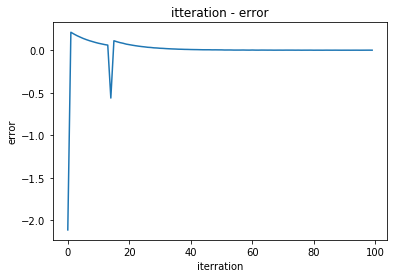

In [147]:
x = np.arange(0, 100, 1)
y = np.array(train_loss_list)[0:100]
plt.plot(x, y)

plt.xlabel("iterration") 
plt.ylabel("error")
plt.title('itteration - error')

plt.show()

In [88]:
x = 

AttributeError: 'numpy.ndarray' object has no attribute 'map'

In [80]:
count = 0
for i in range(10):
    count += 1 if i == 0 else 0 

count

1